In [1]:
import pandas as pd
import numpy as np
import os
import rasterio

In [3]:
data = pd.read_csv('../raw_data/nig_eth.csv')

In [4]:
data.shape

(1187, 5)

In [5]:
data["nightlights"].value_counts()


0.000000    352
0.008249      2
0.107431      2
0.070480      2
0.020875      2
           ... 
0.042360      1
0.007008      1
1.677114      1
0.784345      1
0.003922      1
Name: nightlights, Length: 829, dtype: int64

In [6]:
def drop_0s(df):
    """
    Elimina el 90% de las filas donde la columna 'nightlights' es igual a 0 de forma aleatoria.

    Args:
    df (pandas.DataFrame): DataFrame de entrada que contiene una columna 'nightlights'.

    Returns:
    pandas.DataFrame: DataFrame con el 90% de las filas con 'nightlights' igual a 0 eliminadas.
    """
    # Filtrar filas donde 'nightlights' es igual a 0
    zero_nightlights = df[df['nightlights'] == 0]
    
    # Calcular el número de filas a mantener (10% de las filas con 'nightlights' igual a 0)
    n_keep = int(0.1 * len(zero_nightlights))
    
    # Seleccionar aleatoriamente el 10% de las filas para mantener
    rows_to_keep = zero_nightlights.sample(n=n_keep, random_state=42)
    
    # Filtrar filas donde 'nightlights' no es igual a 0
    non_zero_nightlights = df[df['nightlights'] != 0]
    
    # Concatenar las filas no cero con las 10% de filas cero seleccionadas para mantener
    new_df = pd.concat([non_zero_nightlights, rows_to_keep])
    
    # Opcional: Reordenar el DataFrame final
    new_df = new_df.sample(frac=1).reset_index(drop=True)
    
    return new_df


In [7]:
new_data = drop_0s(data)
new_data["nightlights"].value_counts()

0.000000    35
0.642540     2
0.070480     2
0.001730     2
0.107431     2
            ..
6.403343     1
0.007173     1
6.672463     1
0.171424     1
0.031096     1
Name: nightlights, Length: 829, dtype: int64

In [8]:
def extract_subimage(src, lat, lon):
    """
    Extrae una sub-imagen de tamaño especificado alrededor de un punto central dado.
    
    Args:
    src (rasterio.io.DatasetReader): El objeto fuente abierto de Rasterio.
    lat (float): Latitud del centro de la sub-imagen.
    lon (float): Longitud del centro de la sub-imagen.
    km_per_pixel (float): Cuántos kilómetros representa un píxel.
    size_km (int): Tamaño de un lado de la sub-imagen cuadrada en kilómetros.
    
    Returns:
    np.ndarray: La sub-imagen extraída como una matriz de NumPy.
    """
    # Convertir coordenadas geográficas a coordenadas de píxel
    px, py = ~src.transform * (lon, lat)
    px, py = int(px), int(py)
    
    # Calcular el rango en píxeles para la sub-imagen
    km_per_pixel = 0.418877
    pixel_range = int(10 / km_per_pixel / 2)
    
    # Extraer la sub-imagen
    window = rasterio.windows.Window(px - pixel_range, py - pixel_range, 2 * pixel_range, 2 * pixel_range)
    sub_image = src.read(1, window=window)
    
    return sub_image



In [9]:
new_data

,country,cluster_lat,cluster_lon,cons_pc,nightlights
0,ng,6.328518,7.923226,1.508068,0.005020
1,ng,7.530909,3.458990,10.475986,0.001522
2,eth,9.037509,38.737811,11.936232,12.619624
3,ng,7.361272,9.192184,3.433500,0.003513
4,eth,14.288590,38.210252,13.926005,0.023848
...,...,...,...,...,...
865,ng,5.633261,5.890409,1.758470,0.210181
866,eth,7.020470,40.319489,23.640701,0.000772
867,eth,11.576320,37.366725,18.955686,2.193990
868,ng,7.723000,5.723021,4.263585,0.001451


In [11]:

import matplotlib.pyplot as plt
import rasterio
source = rasterio.open("../raw_data/picture.tif")
X = []
for idx, row in new_data.iterrows():
    sub_image = extract_subimage(source, row['cluster_lat'], row['cluster_lon'])
    X.append(sub_image)

In [63]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
X_tensor = tf.convert_to_tensor(X)
X_tensor = tf.expand_dims(X_tensor, axis=-1)
X_resized = tf.image.resize(X_tensor, [32,32]) 
X_resized

<tf.Tensor: shape=(870, 32, 32, 1), dtype=float32, numpy=
array([[[[ 3.3054192 ],
         [ 2.5418506 ],
         [ 1.8020653 ],
         ...,
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]],

        [[ 3.3192399 ],
         [ 2.6220539 ],
         [ 1.9355963 ],
         ...,
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]],

        [[ 3.0826304 ],
         [ 2.5649123 ],
         [ 2.0373151 ],
         ...,
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]],

        ...,

        [[ 0.        ],
         [ 0.        ],
         [ 0.        ],
         ...,
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]],

        [[ 0.        ],
         [ 0.        ],
         [ 0.        ],
         ...,
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]],

        [[ 0.        ],
         [ 0.        ],
         [ 0.        ],
         ...,
         [ 0.        ],
         [ 0.     

<tf.Tensor: shape=(870, 32, 32, 1), dtype=float32, numpy=
array([[[[ 3.3054192 ],
         [ 2.5418506 ],
         [ 1.8020653 ],
         ...,
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]],

        [[ 3.3192399 ],
         [ 2.6220539 ],
         [ 1.9355963 ],
         ...,
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]],

        [[ 3.0826304 ],
         [ 2.5649123 ],
         [ 2.0373151 ],
         ...,
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]],

        ...,

        [[ 0.        ],
         [ 0.        ],
         [ 0.        ],
         ...,
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]],

        [[ 0.        ],
         [ 0.        ],
         [ 0.        ],
         ...,
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]],

        [[ 0.        ],
         [ 0.        ],
         [ 0.        ],
         ...,
         [ 0.        ],
         [ 0.     

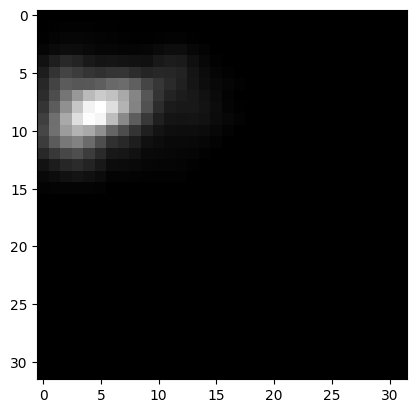

In [69]:
data[16:17]

,country,cluster_lat,cluster_lon,cons_pc,nightlights
16,eth,5.299477,37.482618,3.249503,0.012299


In [155]:

# # vmin, vmax = np.percentile(sub_image, [2,98]) 
# # plt.figure(figsize=(10, 10))  # Tamaño de la figura, ajustable según necesidad
# plt.imshow(X[0], cmap='gray')

In [70]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten, Conv2D

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32, 3))

# for layer in base_model.layers:
#     layer.trainable = False
    
model = models.Sequential([
    base_model,
    # add CNN layers
    layers.Dense(32, activation='relu'),
    layers.Flatten(),
    layers.Dense(10, activation='relu'),
    layers.Dropout(0.2),
    
    layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam',
              loss='mae',
              metrics=['mae'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 dense_6 (Dense)             (None, 1, 1, 32)          16416     
                                                                 
 flatten_2 (Flatten)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 14,731,445
Trainable params: 14,731,445


In [72]:
# do a grid search for the best hyperparameters
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

# model_wrapper = KerasRegressor(build_fn=model, verbose=0)


# params_grid ={
#     'epochs': [10, 20],
#     'batch_size': [32, 64],
#     'learning_rate': [0.1, 0.01]
# }
y = new_data['cons_pc']
X_rgb = tf.image.grayscale_to_rgb(X_resized)
X_bgr = X_rgb[..., ::-1]

X_train = X_bgr[:696]
y_train = y[:696]
X_test = X_bgr[696:]
y_test = y[696:]

# search = GridSearchCV(estimator=model_wrapper, param_grid=params_grid, cv=3, n_jobs=-1, scoring='neg_mean_absolute_error')

# search.fit(X_train, y_train)

In [187]:
# import preprocess_ input from keras.applications.vgg16
# from tensorflow.keras.applications.vgg16 import preprocess_input
# y = new_data['cons_pc']



In [73]:
# import early stopping
from tensorflow.keras.callbacks import EarlyStopping

model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.2, callbacks=[EarlyStopping(patience=5)])

Epoch 1/30
35/35 [==============================] - 19s 448ms/step - loss: 10.2647 - mae: 10.2647 - val_loss: 4.5920 - val_mae: 4.5920
Epoch 2/30
35/35 [==============================] - 15s 435ms/step - loss: 4.2591 - mae: 4.2591 - val_loss: 4.8903 - val_mae: 4.8903
Epoch 3/30
35/35 [==============================] - 15s 428ms/step - loss: 4.4514 - mae: 4.4514 - val_loss: 4.4723 - val_mae: 4.4723
Epoch 4/30
35/35 [==============================] - 15s 432ms/step - loss: 4.4046 - mae: 4.4046 - val_loss: 4.3697 - val_mae: 4.3697
Epoch 5/30
35/35 [==============================] - 15s 419ms/step - loss: 4.2625 - mae: 4.2625 - val_loss: 4.4693 - val_mae: 4.4693
Epoch 6/30
35/35 [==============================] - 15s 427ms/step - loss: 4.3157 - mae: 4.3157 - val_loss: 4.6263 - val_mae: 4.6263
Epoch 7/30
35/35 [==============================] - 15s 420ms/step - loss: 4.2780 - mae: 4.2780 - val_loss: 4.4517 - val_mae: 4.4517
Epoch 8/30
35/35 [==============================] - 15s 432ms/step 

In [74]:
score = model.evaluate(X_test, y_test)
score

6/6 [==============================] - 1s 100ms/step - loss: 3.6090 - mae: 3.6090


[3.609036445617676, 3.609036445617676]

In [76]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

6/6 [==============================] - 1s 86ms/step


-0.1688381025713379